In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow
import warnings
warnings.filterwarnings("ignore")

import dtale
import explore as ex

In [2]:
df = wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,tax_amnt,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [3]:
train_validate, test = train_test_split(df, test_size=.2, random_state=99)
train, validate = train_test_split(train_validate, test_size=.3, random_state=99)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [ ]:
target = 'tax_value'
features = [col for col in df.columns if col != target]
quant_features = [feature for feature in features if df[feature].dtype != object]

In [ ]:
def plot_variable_pairs(df):
    quant_features = [col for col in df.columns if df[col].dtype != object]
    feature_combos = list(itertools.combinations(quant_features, 2))
    for combo in feature_combos:
        sns.lmplot(x=combo[0], y=combo[1], data=df, line_kws={'color': 'orange'})
        plt.show()

In [4]:
sample_train = train.sample(10000)
sample_train.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,tax_amnt,fips
253324,3,2.0,1519,445000,1952,5455.21,6037
1890231,3,1.0,1098,287784,1949,3869.32,6037
821824,4,2.0,1521,181815,1957,3621.48,6037
1768693,4,3.0,2337,936749,1954,10134.92,6059
2058936,2,1.0,1082,189503,1927,2973.50,6037


In [ ]:
sample_train.dtale()

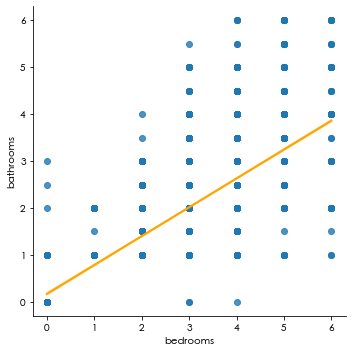

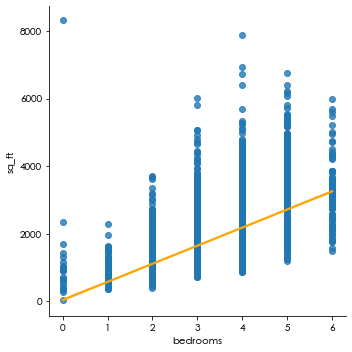

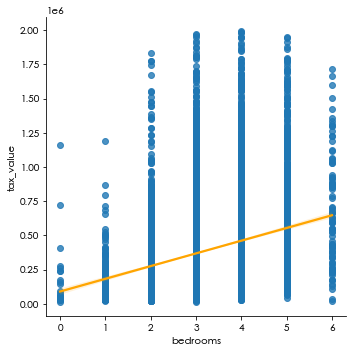

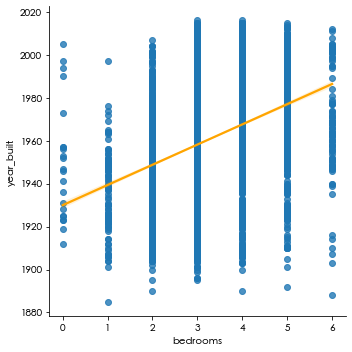

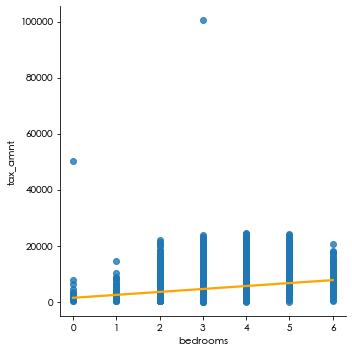

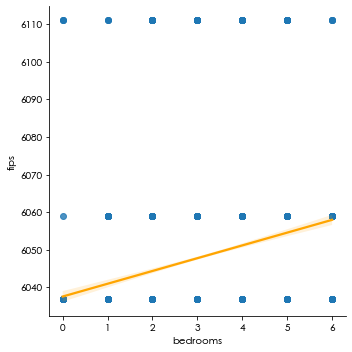

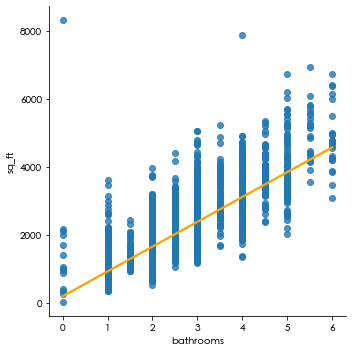

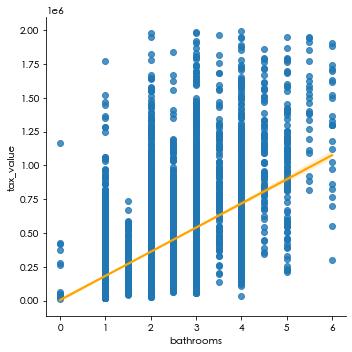

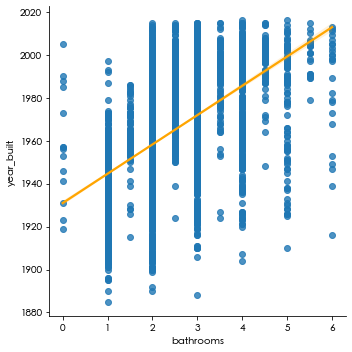

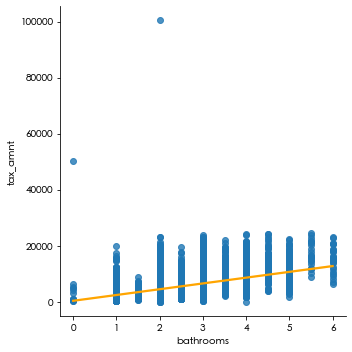

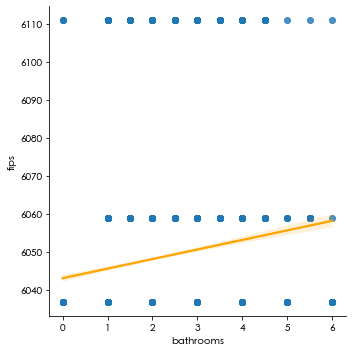

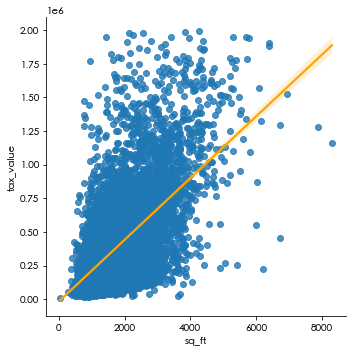

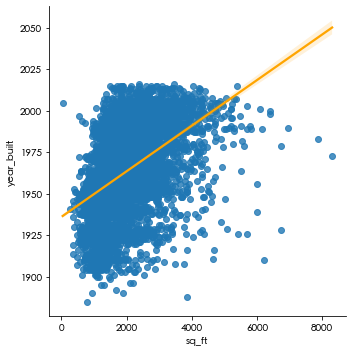

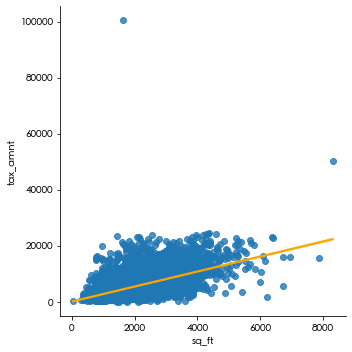

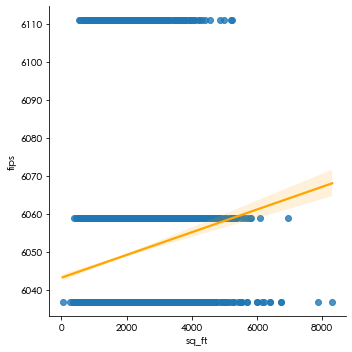

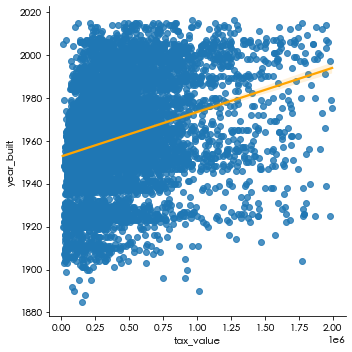

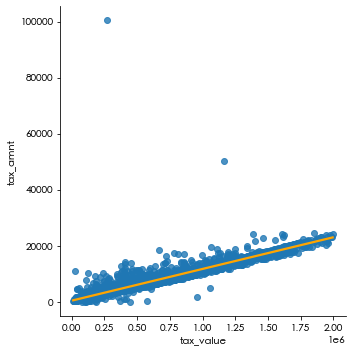

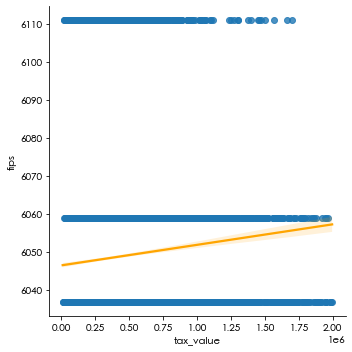

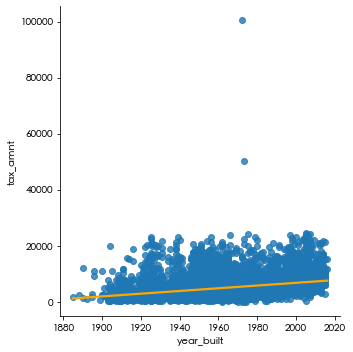

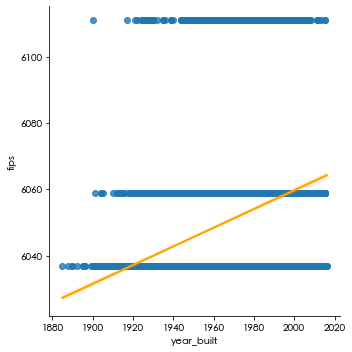

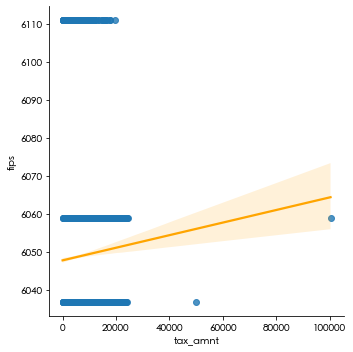

In [7]:
ex.plot_variable_pairs(sample_train)

In [ ]:
#feature changes over time
for features in quant_features:
    if features != 'year_built':
        sns.lmplot(x ='year_built', y = features, data = sample_train, line_kws={'color': 'orange'})
        plt.show()

In [ ]:

    
categ_vars = [col for col in train.columns if (train[col].dtype == 'object') or (len(train[col].unique()) < 10)]
cont_vars = [col for col in train.columns if (col not in categ_vars)]


In [ ]:
def plot_categorical_and_continuous_vars(df):    
    categ_vars = [col for col in df.columns if (df[col].dtype == 'object') or (len(df[col].unique()) < 10)]
    cont_vars = [col for col in df.columns if (col not in categ_vars)]
    
    
    for cont_var in cont_vars:
        for categ_var in categ_vars:

            plt.figure(figsize=(30,10))
            
            # barplot of average values
            plt.subplot(131)
            sns.barplot(data=df,
                        x=categ_var,
                        y=cont_var)
            plt.axhline(df[cont_var].mean(), 
                        ls='--', 
                        color='black')
            plt.title(f'{cont_var} by {categ_var}', fontsize=14)
            
            # box plot of distributions
            plt.subplot(132)
            sns.boxplot(data=df,
                          x=categ_var,
                          y=cont_var)
            
            # swarmplot of distributions
            
            # for larger datasets, use a sample of n=1000
            if len(df) > 1000:
                train_sample = df.sample(1000)

                plt.subplot(133)
                sns.swarmplot(x=categ_var,
                              y=cont_var,
                              data=train_sample)
            
            # for smaller datasets, plot all data
            else:
                plt.subplot(133)
                sns.swarmplot(x=categ_var,
                              y=cont_var,
                              data=df)
            plt.show()

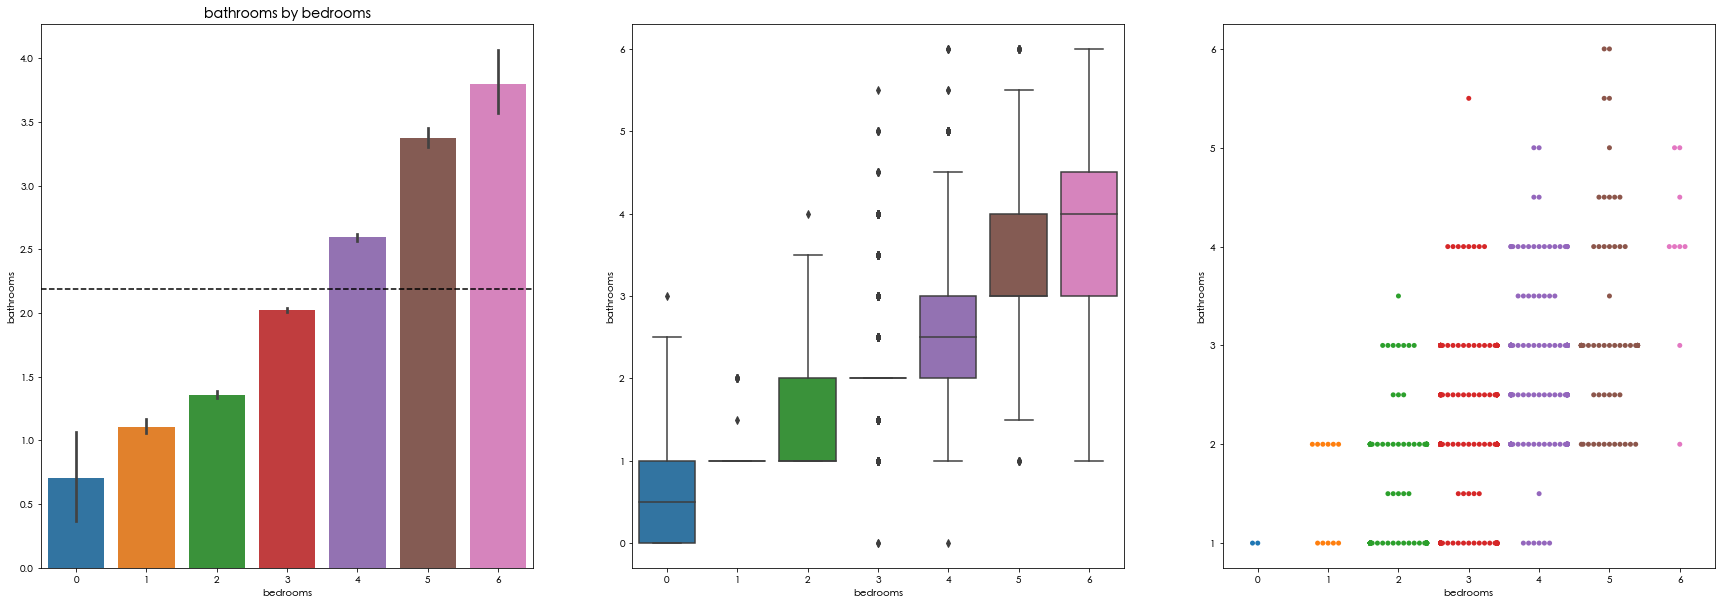

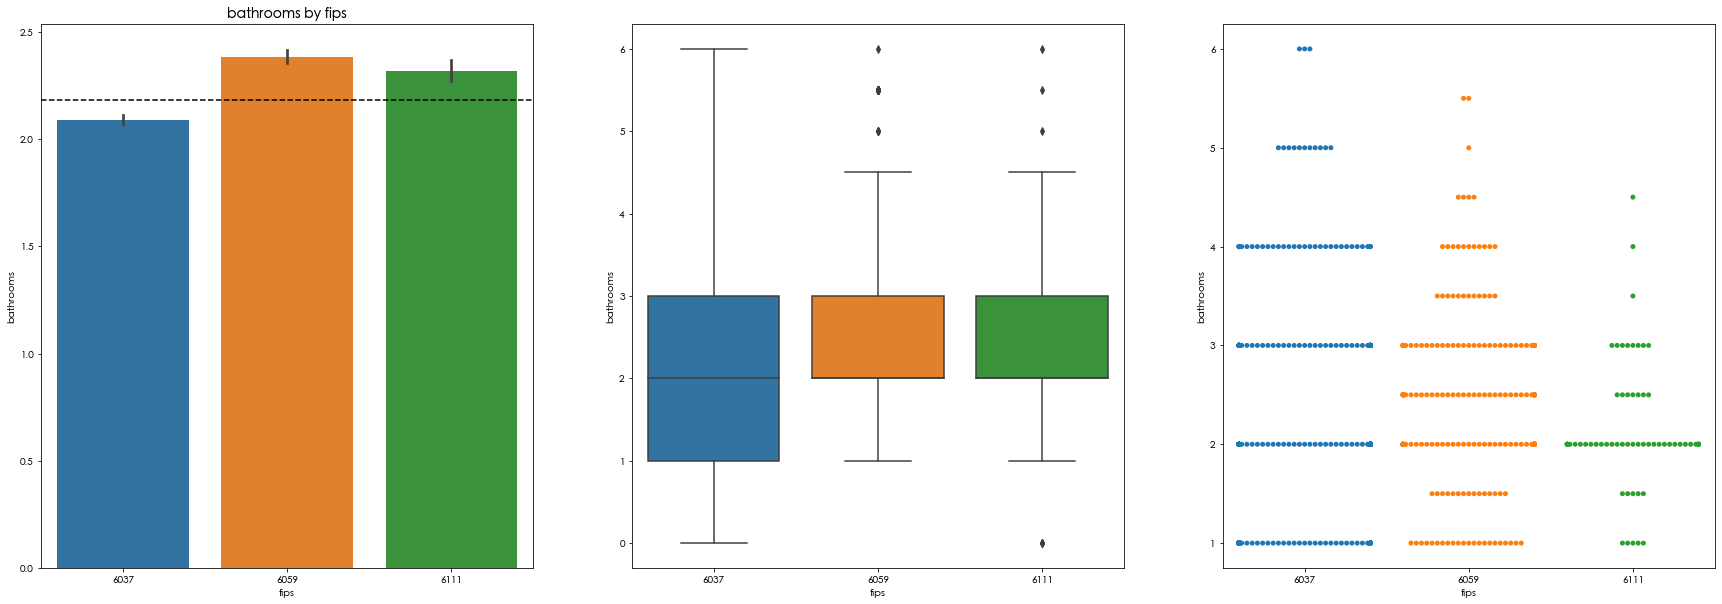

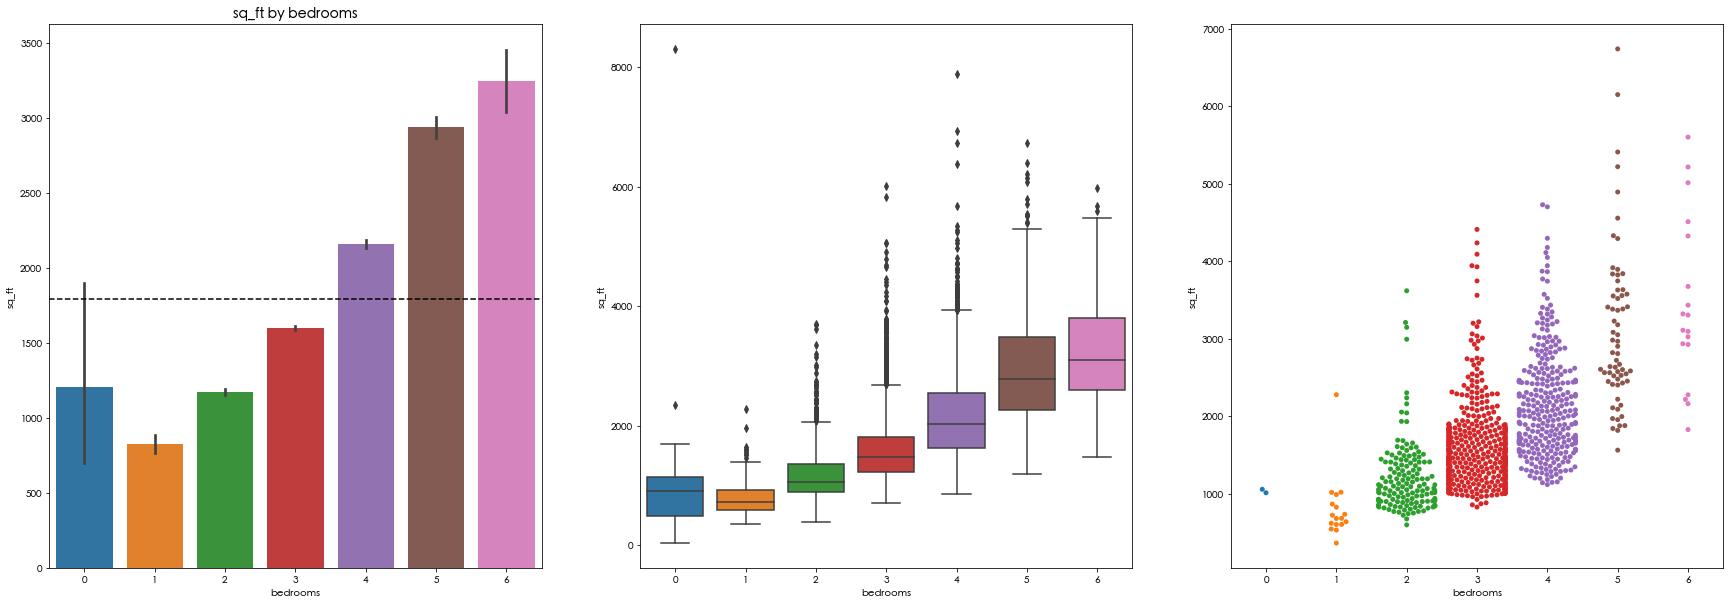

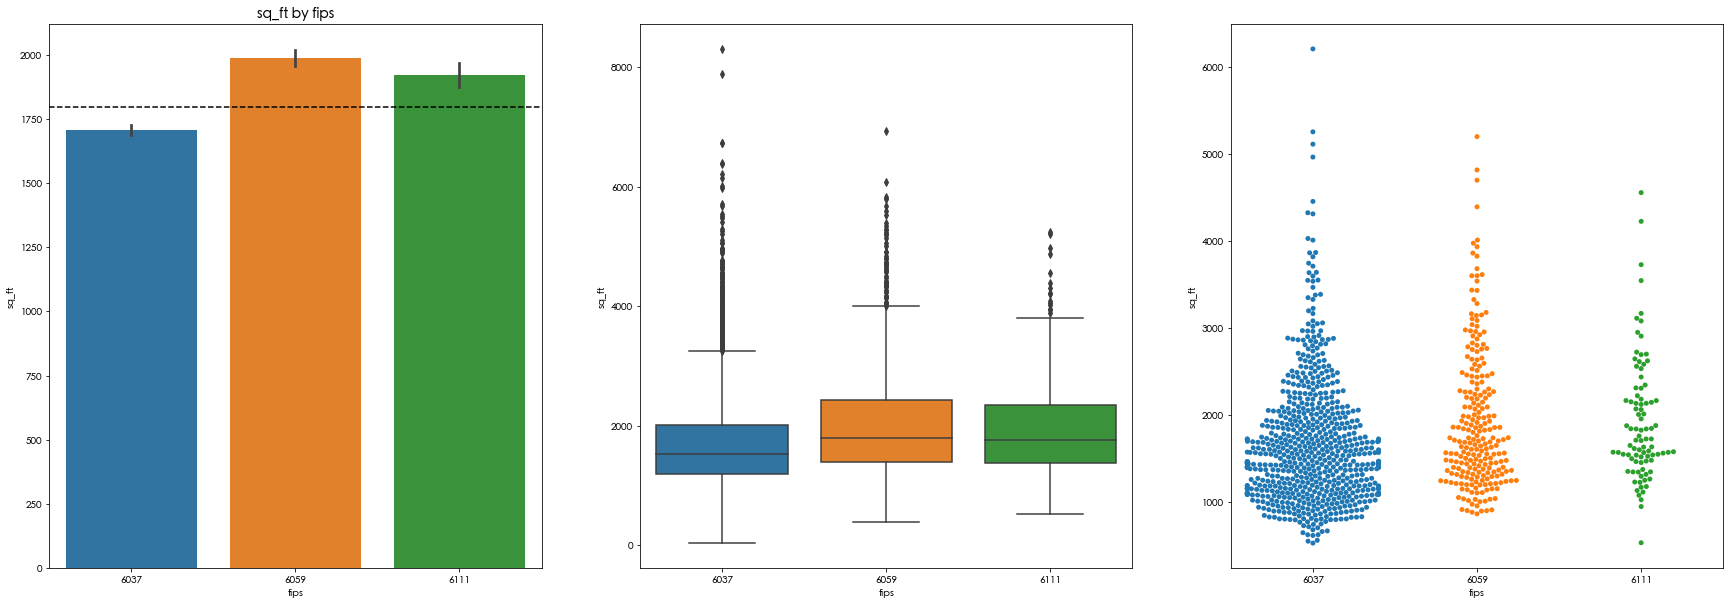

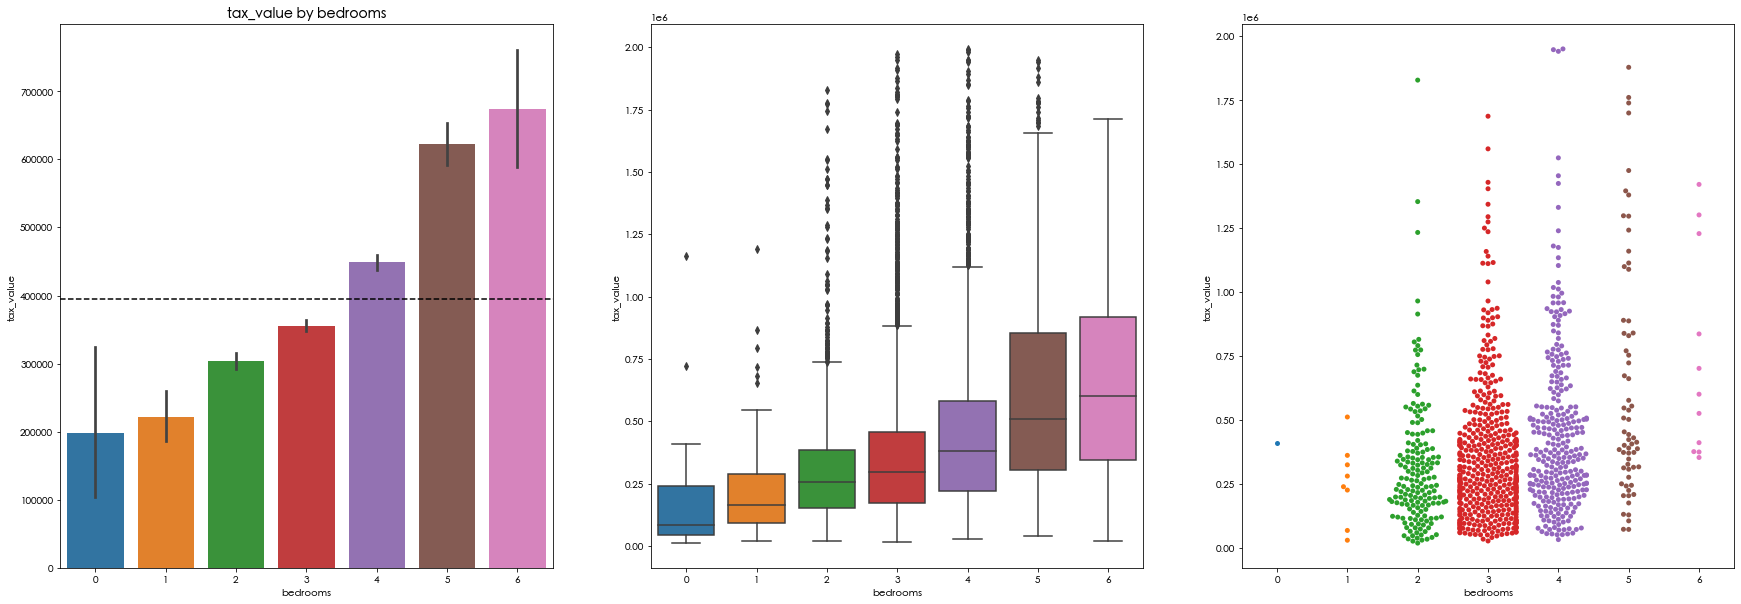

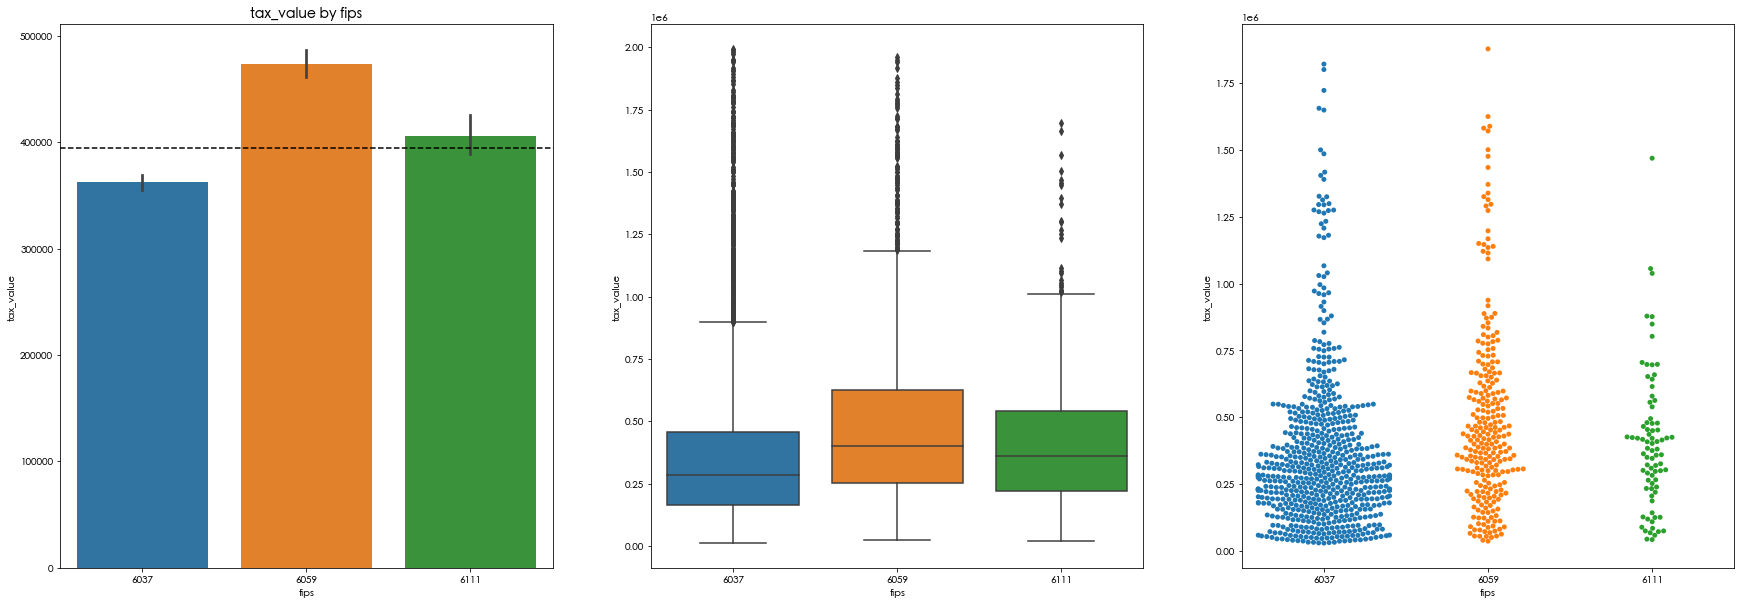

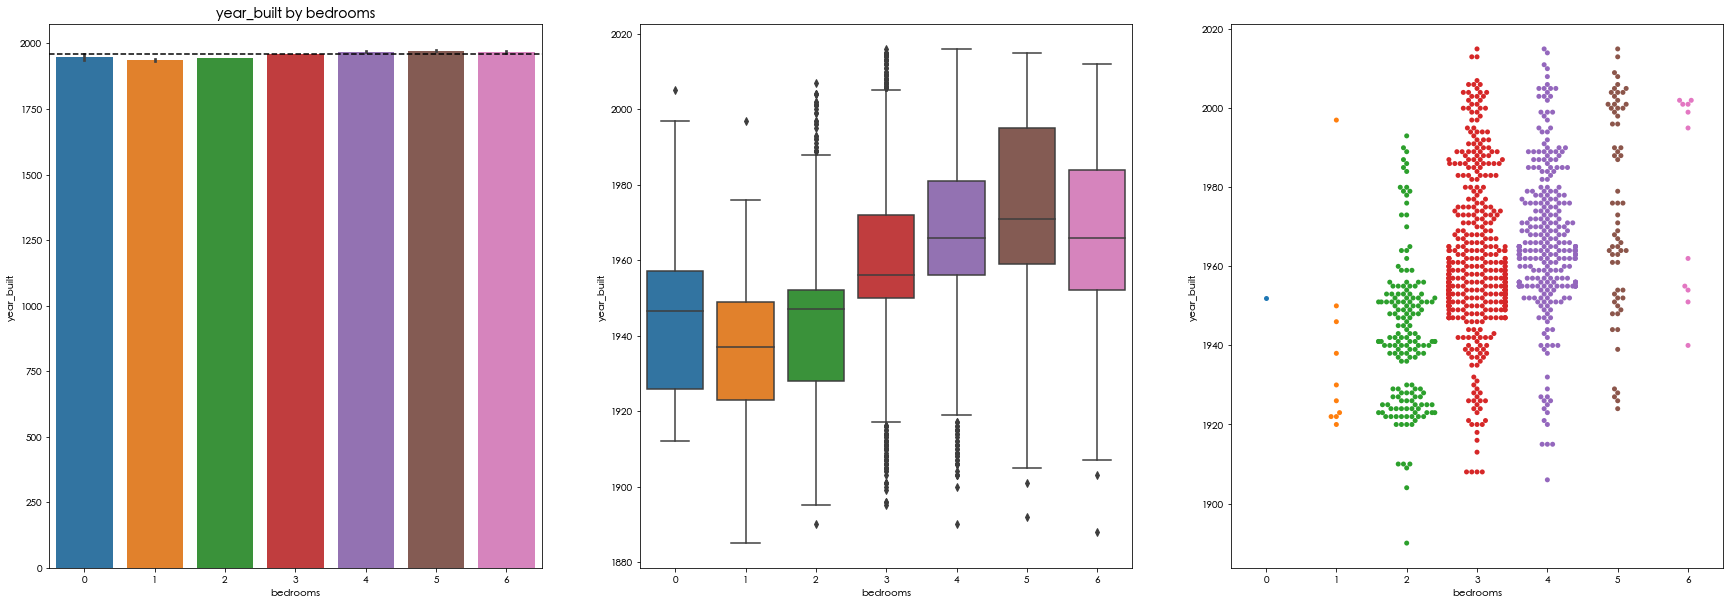

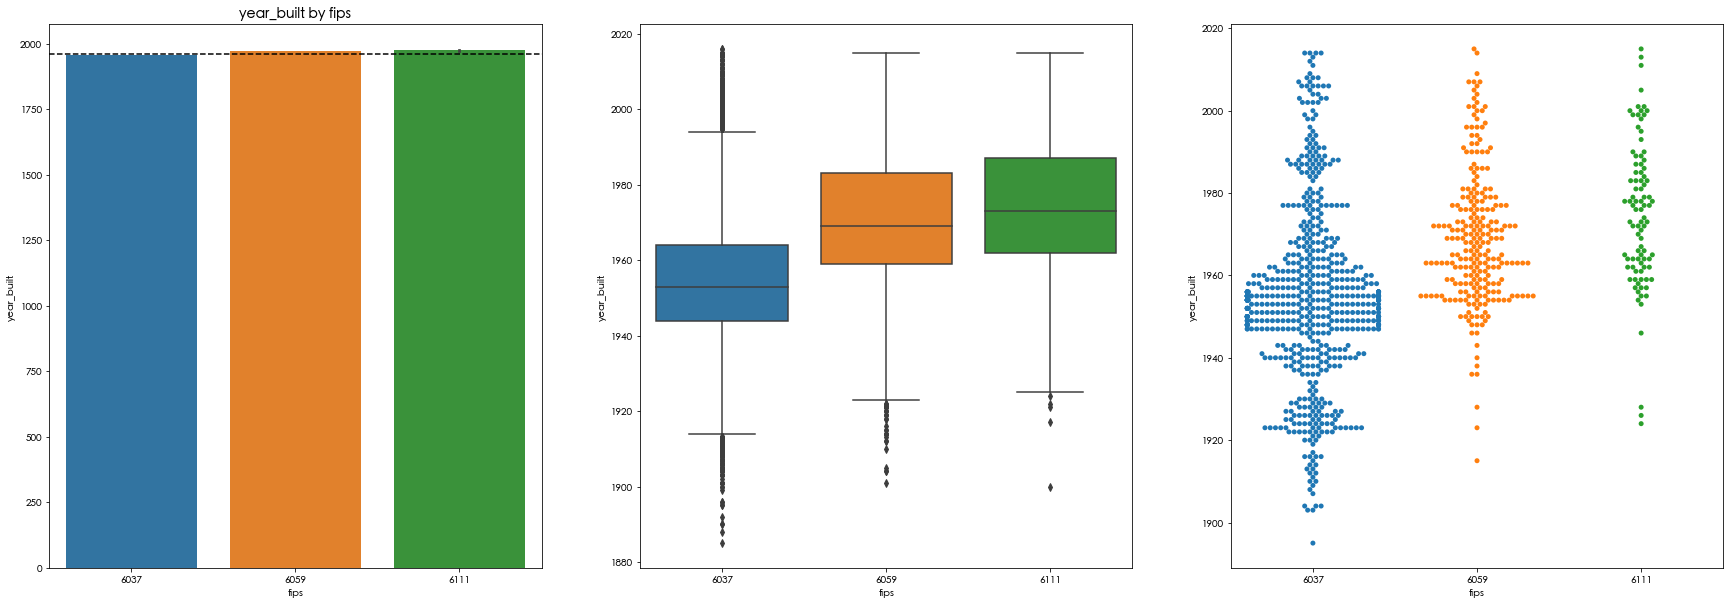

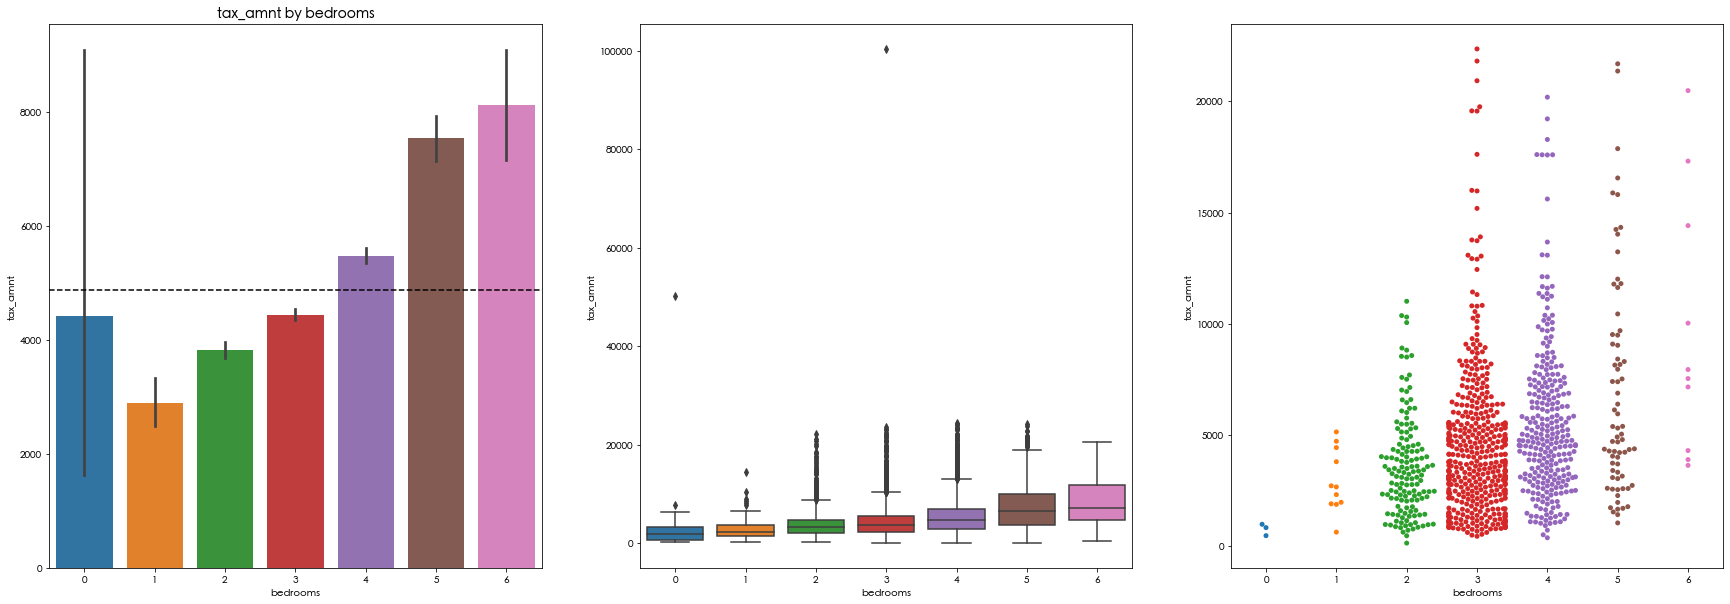

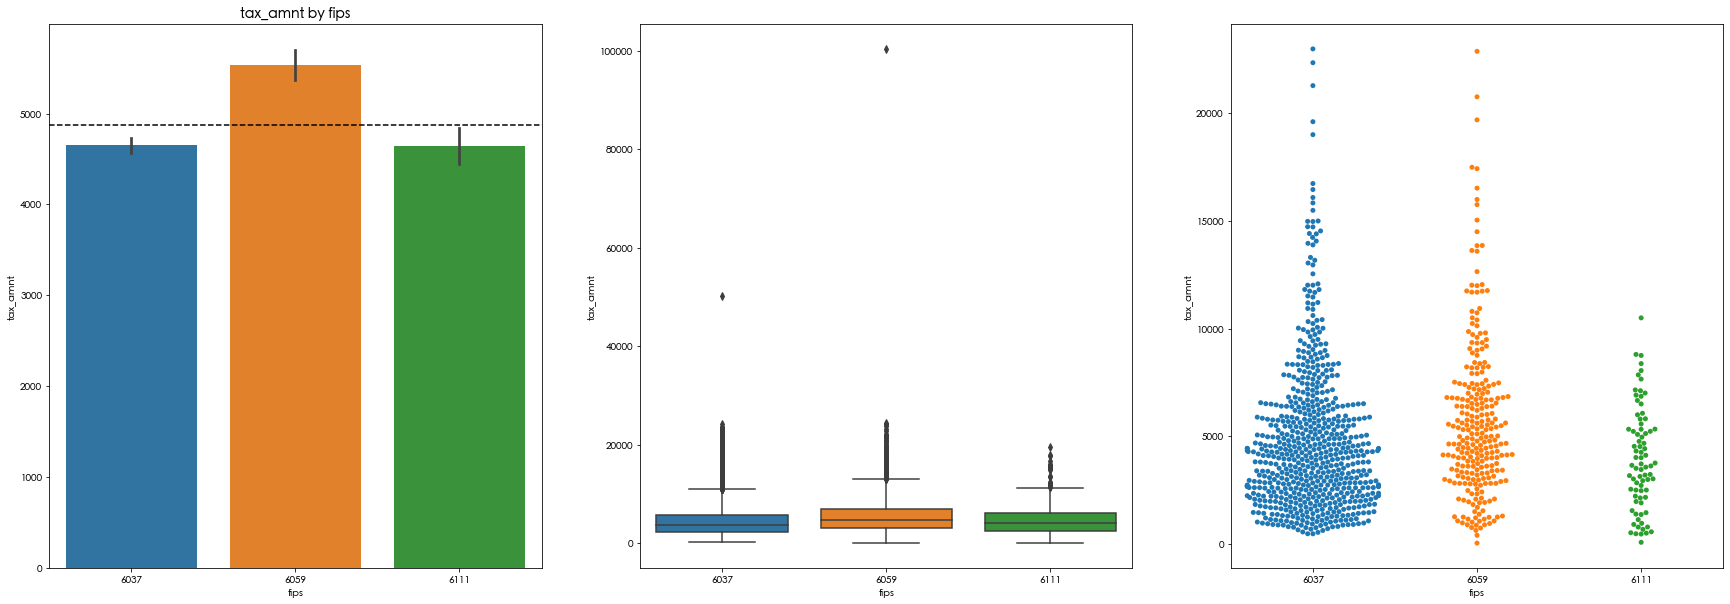

In [8]:
plot_categorical_and_continuous_vars(sample_train)